<a href="https://colab.research.google.com/github/keshav211/IITM-Stats/blob/main/Keshav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability in Python

# Importing packages

You can ignore this part for now.

In [ ]:
import numpy as np

# Import statistics module
We will use scipy.stats, which has several functions for statistics and probability distributions. 

In [ ]:
import scipy.stats as st

# Import pandas, matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fitting a distribution and estimating parameters
Interarrival times in a Gamma ray experiment are given in the book "Mathematical Statistics and Data Analysis" by John Rice. The data is in the form of an excel file. 

We will use the pandas module in python to read the excel file.

In [ ]:
df = pd.read_excel(r'/content/bunny.xlsx')
df

,Unnamed: 0,Unnamed: 1,Data
0,NaN,NaN,518
1,NaN,NaN,400
2,NaN,NaN,532
3,NaN,NaN,546
4,NaN,NaN,528
...,...,...,...
4495,NaN,NaN,497
4496,NaN,NaN,529
4497,NaN,NaN,524
4498,NaN,NaN,400


We see that there are 3935 samples of data. To get a sense of the distribution, we should plot a histogram.

(array([231., 206., 250., 194., 270., 198., 244., 231., 247., 189., 237.,
        207., 241., 218., 210., 214., 245., 200., 229., 239.]),
 array([400. , 407.5, 415. , 422.5, 430. , 437.5, 445. , 452.5, 460. ,
        467.5, 475. , 482.5, 490. , 497.5, 505. , 512.5, 520. , 527.5,
        535. , 542.5, 550. ]),
 <a list of 20 Patch objects>)

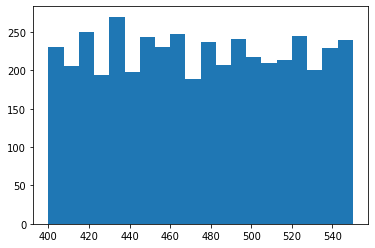

In [ ]:
plt.hist(df['Data'],bins=20)

# Fitting a Uniform distribution
From the histogram, the distribution could be modelled as Normal(**$a$**,**$b$**). The next step is to estimate $a$ and $b$ from the given samples.

## Method of moments
Suppose $m_1$ and $m_2$ are the first and second moments of the samples. The method of moments estimates are obtained by solving
$$m_1=\frac{a+b}{2},$$
$$m_2=\frac{a^2 +ab + b^2}{3}.$$
##The solution results is
$${a}={m_1-\sqrt{3(m_2 - m_1^2)}}.$$
$${b}={m_1+\sqrt{3(m_2 - m_1^2)}}.$$



> Here $m_1$ is observed to be the $sample$ $mean$ and it can be observed that $\sqrt{(m_2 - m_1^2)}$ is nothing but the $variance$ of the observations.  



In [ ]:
x = np.array(df['Data'])
m1 = np.average(x)
ss = np.var(x)
print(m1)
print(ss)


474.5417777777778
1891.7993657283948


In [ ]:
a = m1 - (1.73*(ss**0.5))
b = m1 + (1.73*(ss**0.5))
print(a)
print(b)

399.2957391997336
549.787816355822


## **Check to see if the distribution used fit's or not.**

The data generated was generated using python for a range of **400** to **550** hence the value that we get of the estimators fit and the method of moment satisfies our expression.

# Bootstrap
How do we find the bias and variance of the estimator? Theoretical derivations of the sampling distributions may be too cumbersome and difficult in most cases. Bootstrap is a Monte Carlo simulation method for computing metrics such as bias, variance and confidence intervals for estimators.

In the above example, we have found ${a}=399.2957...$ and ${b}=549.7878....$. Using these values, we simulate $n=4500$ *iid* samples from uniform$(399.2957...,549.7878....)$ and, using the simulated samples, we compute new estimates of $a$ and $b$ and call them $\hat{a}$ and $\hat{b}$. Now, repeat the simulation $N$ times to get estimates $\hat{a}_i$ and $\hat{b}_i$, $i=1,2,\ldots,N$.

The sample variance of $\{\hat{a}_1, \hat{a}_2,\ldots,\hat{a}_N\}$ is taken to be the bootstrap estimate for the variance of the estimator.

In [ ]:
N = 1000
n = 4500
a1 = np.zeros(N)
b1 = np.zeros(N)
for i in np.arange(N):
  xi = st.uniform.rvs(a,b,size=n)
  m1i = np.average(xi); ssi = np.var(xi) 
  a1[i] = m1i - (1.73*(ssi**0.5)) ; b1[i] = m1 + (1.73*(ssi**0.5))

We can see the histograms of the estimates to get an idea of the spread of the values.

(array([0.00459427, 0.0130171 , 0.04517698, 0.1454852 , 0.20367928,
        0.1853022 , 0.11868529, 0.04211414, 0.00612569, 0.00153142]),
 array([742.7332999 , 744.03927469, 745.34524948, 746.65122427,
        747.95719906, 749.26317385, 750.56914864, 751.87512343,
        753.18109822, 754.48707301, 755.79304779]),
 <a list of 10 Patch objects>)

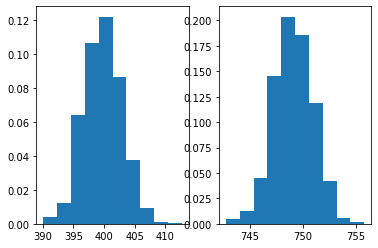

In [ ]:
ax1 = plt.subplot(121)
ax1.hist(a1,density=True)
ax2 = plt.subplot(122)
ax2.hist(b1,density=True)

Notice how the histograms look roughly normal.

The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator.

In [ ]:
print(np.sqrt(np.var(a1)))
print(np.sqrt(np.var(b1)))

3.105387101130484
1.8452024076591012


## Confidence intervals
Suppose a parameter $\theta$ is estimated as $\hat{\theta}$, and suppose the distribution of $\hat{\theta}-\theta$ is known. Then, to obtain $(100(1-\alpha))$% confidence intervals (typical values are $\alpha=0.1$ for 90% confidence intervals and $\alpha=0.05$ for 95% confidence intervals), we use the CDF of $\hat{\theta}-\theta$ to obtain $\delta_1$ and $\delta_2$ such that
$$P(\hat{\theta}-\theta\le\delta_1)=1-\frac{a}{2},$$
$$P(\hat{\theta}-\theta\le\delta_2)=\frac{a}{2}.$$
Actually, the inverse of the CDF of $\hat{\theta}-\theta$ is used to find the above $\delta_1$ and $\delta_2$. From the above, we see that
$$P(\hat{\theta}-\theta \le \delta_1)-P(\hat{\theta}-\theta \le \delta_2)= P(\delta_2< \hat{\theta}-\theta \le \delta_1)=1-\frac{a}{2}-\frac{a}{2}=1-a.$$
The above is rewritten as
$$P(\hat{\theta}-\delta_1\le\theta<\hat{\theta}-\delta_2)=1-a,$$
and $[\hat{\theta}-\delta_1,\hat{\theta}-\delta_2]$ is interpreted as the $100(1-a)$% confidence interval.

## Bootstrap confidence intervals for **a**
The CDF of $\hat{\theta}-\theta$ might be difficult to determine in many cases, and the bootstrap method is used often to estimate $\delta_1$ and $\delta_2$. We consider the list of numbers $\{\hat{a_1}-399.2957...,\ldots,\hat{a}_N-399.2957...\}$ and pick the $100(a)$-th percentile and $100(1-a)$-th percentile.

In [ ]:
del1 = np.percentile(a1 - a, 97.5)
del2 = np.percentile(a1 -a, 2.5)
print([del1,del2])

[6.4962515202825255, -5.022722550698198]


The 95% confidence interval for **$a$** using the method of moments estimator works out to $[(399.2957-6.49625),(399.2957-(-5.0227))]=[392.7995,404.3184]$.

## Maximum likelihood
We now turn to the maximum likelihood estimator for $\alpha$ and $\beta$. The likelihood $L(x_1,\ldots,x_n)$ can be written as
$$L = \frac{\beta^\alpha}{\Gamma(\alpha)}x_1^{\alpha-1}e^{-\beta x_1}\,\frac{\beta^\alpha}{\Gamma(\alpha)}x_2^{\alpha-1}e^{-\beta x_2}\cdots \frac{\beta^\alpha}{\Gamma(\alpha)}x_n^{\alpha-1}e^{-\beta x_n}= \frac{\beta^{n\alpha}}{\Gamma(\alpha)^n}(x_1\cdots x_n)^{\alpha-1}e^{-\beta(x_1+\cdots+x_n)},$$
$$\log L = n\alpha\log\beta-n\log\Gamma(\alpha)+(\alpha-1)\log(x_1\cdots x_n)-\beta(x_1+\cdots+x_n).$$
Differentiating $\log L$ with respect to $\beta$ and equating to zero, we get
$$n\alpha\frac{1}{\beta}-(x_1+\cdots+x_n)=0,\text{or }\alpha=\beta \frac{x_1+\cdots+x_n}{n}.$$
Differentiating $\log L$ with respect to $\alpha$ and equating to zero, we get
$$n\log\beta-n\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}+\log(x_1\cdots x_n)=0.$$
So, we get two equations in the two variables $\alpha$ and $\beta$. However, the equations do not have a closed form solution, and we need to solve them numerically or approximately. From the first equation, we have $\log\beta=\log\alpha-\log\frac{x_1+\cdots+x_n}{n}$. Using this in the second equation, we get
$$\log\alpha - \frac{\Gamma'(\alpha)}{\Gamma(\alpha)}=\log\frac{x_1+\cdots+x_n}{n}-\frac{1}{n}\log(x_1\cdots x_n).$$
We will now solve the above equation to find the ML estimate of $\alpha$. This will be a numerical solution.

In [ ]:
lm1 = np.average(np.log(x))
#Write the equation as a function
#digamma is the function Gamma'/Gamma
from scipy.special import digamma
fML = lambda a: (np.log(a) - digamma(a) - np.log(m1)+lm1)

We can plot the above function to see how it looks.

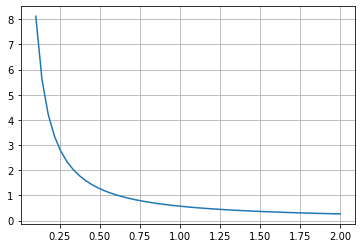

In [ ]:
fig, ax = plt.subplots(1,1)

xx = np.linspace(0.1,2,50)
ax.plot(xx,fML(xx))
ax.grid(True)
plt.show()

In [ ]:
#For solving numerically, we will use scipy.optimize
import scipy.optimize as sopt
sol = sopt.root_scalar(fML, bracket=[0.1,2])
sol.root

ValueError: ignored

In [ ]:
alphaML = sol.root
betaML = alphaML/m1
print([alphaML, betaML])

Let us check the fit with the histogram.

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=50)
xx = np.linspace(0,300,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM),lw='4',alpha=0.7,label='gamma fit MM')
ax.plot(xx, st.gamma.pdf(xx,alphaML,scale=1/betaML),lw='1',label='gamma fit ML')
ax.legend(loc='best')
plt.show()

Both the curves are literally on top of each other showing very good fit. Let us use the bootstrap method to find variance and confidence intervals for the ML estimator.

In [ ]:
N = 1000
n = 3935
alpha_hatML = np.zeros(N)
beta_hatML = np.zeros(N)
for i in np.arange(N):
  xi = st.gamma.rvs(alphaMM,scale=1/betaMM,size=n)
  m1i = np.average(xi); lm1i = np.average(np.log(xi))
  fMLi = lambda a: (np.log(a) - digamma(a) - np.log(m1i)+lm1i)
  soli = sopt.root_scalar(fMLi, bracket = [0.1,2]) 
  alpha_hatML[i] = soli.root; beta_hatML[i] = soli.root / m1i

In [ ]:
print(np.sqrt(np.var(alpha_hatML)))
print(np.sqrt(np.var(beta_hatML)))

We see that the variance of the bootstrap ML estimator is lesser than that of bootstrap MM estimator.